# Notebook Overview

In this notebook, we perform an Exploratory Data Analysis on a dataset and train a machine learningng model that focuses on predicting the sales of various products in grocery stores based on historical data. This case study explores the data, methodologies, and models used to tackle the challenge, providing insights into the predictive analytics process.

# Set Up



## *Installation*

Here is the section where we installed all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# Installatin of packages
#!pip install numpy
#!pip install pandas
#!pip install patool
#!pip install forex_python
#!pip install pandas_profiling
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
#!pip install -U imbalanced-learn
#!pip install plotly

# *Importation*
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:
# Data handling
import pandas as pd
import numpy as np
from statistics import mean
from forex_python.converter import CurrencyRates
from babel.numbers import format_currency
import datetime as dt

# Statistics
from scipy import stats
from scipy.stats import shapiro, trim_mean, mstats, mode
from scipy.stats import ttest_ind


# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import plotly
from plotly.offline import plot
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go

# balance data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Machine learning libraries and metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, Binarizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score,roc_curve, auc,roc_auc_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
import joblib
from sklearn.pipeline import Pipeline
import pickle
# Other packages
from statsmodels.tsa.seasonal import seasonal_decompose
import os
import warnings
warnings.filterwarnings('ignore')
import patoolib



# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
testurl="https://raw.githubusercontent.com/Gilbert-B/Forecasting-Sales/main/data/test.csv"
trainurl="https://raw.githubusercontent.com/Gilbert-B/Forecasting-Sales/main/data/train.csv"
dateurl="https://raw.githubusercontent.com/Gilbert-B/Forecasting-Sales/main/data/dates.csv"
holidaysurl="https://raw.githubusercontent.com/Gilbert-B/Forecasting-Sales/main/data/holidays.csv"
storesurl="https://raw.githubusercontent.com/Gilbert-B/Forecasting-Sales/main/data/stores.csv"

In [4]:
test = pd.read_csv(testurl,error_bad_lines=False)
train= pd.read_csv(trainurl,error_bad_lines=False)
date= pd.read_csv(dateurl,error_bad_lines=False)
holidays= pd.read_csv(holidaysurl,error_bad_lines=False)
stores= pd.read_csv(storesurl,error_bad_lines=False)

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info(), etc`

In [5]:
# A quick look at the shape of our train dataset

train.shape

(2248884, 6)

In [6]:
#Looking at the head of our dataset

train.head()

,date,store_id,category_id,target,onpromotion,nbr_of_transactions
0,365,store_1,category_24,0.0,0,0.0
1,365,store_1,category_21,0.0,0,0.0
2,365,store_1,category_32,0.0,0,0.0
3,365,store_1,category_18,0.0,0,0.0
4,365,store_1,category_26,0.0,0,0.0


In [7]:
#Taking a look at the tail
train.tail()

,date,store_id,category_id,target,onpromotion,nbr_of_transactions
2248879,1626,store_9,category_23,539.725,0,2141.0
2248880,1626,store_9,category_20,84.177,0,2141.0
2248881,1626,store_9,category_15,1973.760,3,2141.0
2248882,1626,store_9,category_29,2.000,0,2141.0
2248883,1626,store_9,category_10,27.076,0,2141.0


In [8]:
#Look at the columns in the train dataset and their data types

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248884 entries, 0 to 2248883
Data columns (total 6 columns):
 #   Column               Dtype  
---  ------               -----  
 0   date                 int64  
 1   store_id             object 
 2   category_id          object 
 3   target               float64
 4   onpromotion          int64  
 5   nbr_of_transactions  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 102.9+ MB


In [9]:
#Get more details about the features of our data
train.describe()

,date,target,onpromotion,nbr_of_transactions
count,2.248884e+06,2.248884e+06,2.248884e+06,2.248884e+06
mean,9.955000e+02,3.932649e+02,3.142002e+00,1.573591e+03
std,3.643080e+02,1.174938e+03,1.343616e+01,1.027832e+03
min,3.650000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.800000e+02,0.000000e+00,0.000000e+00,9.440000e+02
50%,9.955000e+02,1.500000e+01,0.000000e+00,1.338000e+03
75%,1.311000e+03,2.230000e+02,1.000000e+00,1.979000e+03
max,1.626000e+03,1.247170e+05,7.410000e+02,8.359000e+03


In [10]:
#Check for missing values
train.isna().sum()

date                   0
store_id               0
category_id            0
target                 0
onpromotion            0
nbr_of_transactions    0
dtype: int64

<AxesSubplot: >

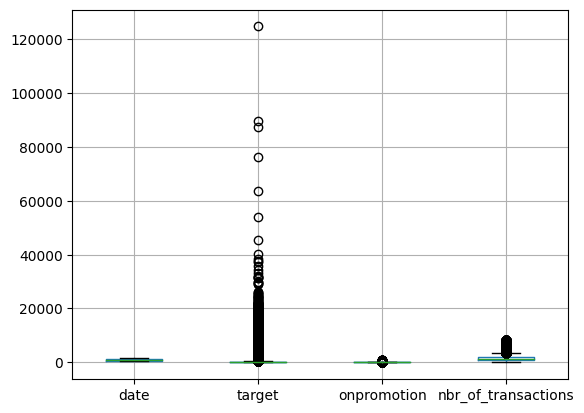

In [11]:
#Check for outliers
train.boxplot()

In [12]:
# A quick look at the shape of our test dataset

test.shape

(99792, 4)

In [13]:
#Looking at the head of our test dataset

test.head()

,date,store_id,category_id,onpromotion
0,1627,store_1,category_24,0
1,1627,store_1,category_21,0
2,1627,store_1,category_32,0
3,1627,store_1,category_18,16
4,1627,store_1,category_26,0


In [14]:
#Taking a look at the tail
test.tail()

,date,store_id,category_id,onpromotion
99787,1682,store_9,category_23,0
99788,1682,store_9,category_20,1
99789,1682,store_9,category_15,7
99790,1682,store_9,category_29,8
99791,1682,store_9,category_10,0


In [15]:
#Look at the columns in the train dataset and their data types

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99792 entries, 0 to 99791
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         99792 non-null  int64 
 1   store_id     99792 non-null  object
 2   category_id  99792 non-null  object
 3   onpromotion  99792 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.0+ MB


In [16]:
#Get more details about the features of our data
test.describe()

,date,onpromotion
count,99792.000000,99792.000000
mean,1654.500000,7.274892
std,16.163311,18.504041
min,1627.000000,0.000000
25%,1640.750000,0.000000
50%,1654.500000,0.000000
75%,1668.250000,6.000000
max,1682.000000,591.000000


In [17]:
#Check for missing values
test.isna().sum()

date           0
store_id       0
category_id    0
onpromotion    0
dtype: int64

<AxesSubplot: >

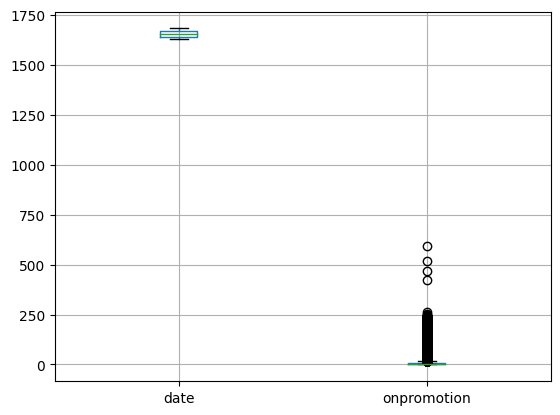

In [18]:
#Check for outliers
test.boxplot()

In [19]:
# A quick look at the shape of our dates dataset

date.shape

(1320, 15)

In [20]:
#Looking at the head of our date dataset

date.head()

,date,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear
0,365,1,1,1,2,1,1,1,True,False,True,False,True,False,101
1,366,1,1,2,3,2,1,1,False,False,False,False,False,False,101
2,367,1,1,3,4,3,1,1,False,False,False,False,False,False,101
3,368,1,1,4,5,4,1,1,False,False,False,False,False,False,101
4,369,1,1,5,6,5,1,1,False,False,False,False,False,False,101


In [21]:
#Looking at the tail of our date dataset

date.tail()

,date,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear
1315,1680,4,8,11,4,223,32,3,False,False,False,False,False,False,432
1316,1681,4,8,12,5,224,32,3,False,False,False,False,False,False,432
1317,1682,4,8,13,6,225,32,3,False,False,False,False,False,False,432
1318,1683,4,8,14,0,226,33,3,False,False,False,False,False,False,433
1319,1684,4,8,15,1,227,33,3,False,False,False,False,False,False,433


In [22]:
date.groupby(['date','year','month','dayofmonth','dayofweek'], as_index=False).nunique()

,date,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear
0,365,1,1,1,2,1,1,1,1,1,1,1,1,1,1
1,366,1,1,2,3,1,1,1,1,1,1,1,1,1,1
2,367,1,1,3,4,1,1,1,1,1,1,1,1,1,1
3,368,1,1,4,5,1,1,1,1,1,1,1,1,1,1
4,369,1,1,5,6,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,1680,4,8,11,4,1,1,1,1,1,1,1,1,1,1
1316,1681,4,8,12,5,1,1,1,1,1,1,1,1,1,1
1317,1682,4,8,13,6,1,1,1,1,1,1,1,1,1,1
1318,1683,4,8,14,0,1,1,1,1,1,1,1,1,1,1


In [23]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   date              1320 non-null   int64
 1   year              1320 non-null   int64
 2   month             1320 non-null   int64
 3   dayofmonth        1320 non-null   int64
 4   dayofweek         1320 non-null   int64
 5   dayofyear         1320 non-null   int64
 6   weekofyear        1320 non-null   int64
 7   quarter           1320 non-null   int64
 8   is_month_start    1320 non-null   bool 
 9   is_month_end      1320 non-null   bool 
 10  is_quarter_start  1320 non-null   bool 
 11  is_quarter_end    1320 non-null   bool 
 12  is_year_start     1320 non-null   bool 
 13  is_year_end       1320 non-null   bool 
 14  year_weekofyear   1320 non-null   int64
dtypes: bool(6), int64(9)
memory usage: 100.7 KB


In [24]:
# A quick look at the shape of our holidays dataset

holidays.shape

(281, 2)

In [25]:
#Looking at the head of our holiday data

holidays.head()

,date,type
0,1,0
1,5,4
2,12,4
3,42,0
4,43,0


In [26]:
#Looking at the tail of our holiday data

holidays.tail()

,date,type
276,1663,2
277,1674,0
278,1679,0
279,1680,1
280,1684,0


In [27]:
# taking a look at the unique values in the type column of the holidays df
holidays.type.unique()

array([0, 4, 2, 5, 1, 3], dtype=int64)

In [28]:
# A quick look at the shape of our stores dataset

stores.shape

(54, 4)

In [29]:
#Looking at the head of our stores data

stores.head()

,store_id,city,type,cluster
0,store_1,0,0,0
1,store_2,0,0,0
2,store_3,0,0,1
3,store_4,0,0,2
4,store_5,1,0,3


In [30]:
#Looking at the tail of our stores data

stores.tail()

,store_id,city,type,cluster
49,store_50,8,4,15
50,store_51,9,4,16
51,store_52,20,4,14
52,store_53,20,0,0
53,store_54,21,2,7


In [31]:
# A look at the unique values in the store_id column of the  stores df
stores.store_id.unique()

array(['store_1', 'store_2', 'store_3', 'store_4', 'store_5', 'store_6',
       'store_7', 'store_8', 'store_9', 'store_10', 'store_11',
       'store_12', 'store_13', 'store_14', 'store_15', 'store_16',
       'store_17', 'store_18', 'store_19', 'store_20', 'store_21',
       'store_22', 'store_23', 'store_24', 'store_25', 'store_26',
       'store_27', 'store_28', 'store_29', 'store_30', 'store_31',
       'store_32', 'store_33', 'store_34', 'store_35', 'store_36',
       'store_37', 'store_38', 'store_39', 'store_40', 'store_41',
       'store_42', 'store_43', 'store_44', 'store_45', 'store_46',
       'store_47', 'store_48', 'store_49', 'store_50', 'store_51',
       'store_52', 'store_53', 'store_54'], dtype=object)

### Hypothesis

***Null Hypothesis:*** Holidays do not affect Sales 

***Alternate Hypothesis:*** Holidays affect Sales






### Issues with the Data Set

1. The Dates in our train, test, dates & holidays dataset are in number format

2. The dayofyear column in our dates dataset ranges from 1 to 366. This will make some days fall on the wrong number

3. The type of the holiday data column is a categoric variable

4. City, type & cluster in our stores dataset are mumerical

### How to deal with the Issues

1. Convert to date format
2.find the sine and cosine of this column to represent the cyclic nature of a year
3.Change the holiday type to the actuall type 
4. Convert to string and make the categories more descriptive.

### Cleaning the Dataset

In [32]:
train

,date,store_id,category_id,target,onpromotion,nbr_of_transactions
0,365,store_1,category_24,0.000,0,0.0
1,365,store_1,category_21,0.000,0,0.0
2,365,store_1,category_32,0.000,0,0.0
3,365,store_1,category_18,0.000,0,0.0
4,365,store_1,category_26,0.000,0,0.0
...,...,...,...,...,...,...
2248879,1626,store_9,category_23,539.725,0,2141.0
2248880,1626,store_9,category_20,84.177,0,2141.0
2248881,1626,store_9,category_15,1973.760,3,2141.0
2248882,1626,store_9,category_29,2.000,0,2141.0


Taking a look at th e training dataset, we see all the areas in our dataset that needs cleaning. We will first start with the date 

#### Date

In [33]:
date

,date,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear
0,365,1,1,1,2,1,1,1,True,False,True,False,True,False,101
1,366,1,1,2,3,2,1,1,False,False,False,False,False,False,101
2,367,1,1,3,4,3,1,1,False,False,False,False,False,False,101
3,368,1,1,4,5,4,1,1,False,False,False,False,False,False,101
4,369,1,1,5,6,5,1,1,False,False,False,False,False,False,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,1680,4,8,11,4,223,32,3,False,False,False,False,False,False,432
1316,1681,4,8,12,5,224,32,3,False,False,False,False,False,False,432
1317,1682,4,8,13,6,225,32,3,False,False,False,False,False,False,432
1318,1683,4,8,14,0,226,33,3,False,False,False,False,False,False,433


In [34]:
date.year.unique()

array([1, 2, 3, 4], dtype=int64)

There are 4 unique years represented with 1,2,3 & 4.
Lets replace the years with 2001,2002,2003 & 2004 respectively

In [35]:
# Define replacements using a dictionary
replacements = {1: 2001, 2: 2002, 3: 2003, 4: 2004}

# Apply replacements using the replace() method
date['year'] = date['year'].replace(replacements)

In [36]:
date.year.unique()

array([2001, 2002, 2003, 2004], dtype=int64)

Next Lets look at the months 

In [37]:
date.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Since we will be join the months to the years and days , lets keep them in the numerical format 

In [38]:
date.dayofmonth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [39]:
# Rename 'dayofmonth' column to 'day'
date.rename(columns={'dayofmonth': 'day'}, inplace=True)

In [40]:
# Combine year, month, and day columns into a single column
try:
    date['full_date'] = pd.to_datetime(date[['year', 'month', 'day']], errors='coerce')
except ValueError as e:
    print(f"Error: {e}")

In [41]:
date

,date,year,month,day,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,full_date
0,365,2001,1,1,2,1,1,1,True,False,True,False,True,False,101,2001-01-01
1,366,2001,1,2,3,2,1,1,False,False,False,False,False,False,101,2001-01-02
2,367,2001,1,3,4,3,1,1,False,False,False,False,False,False,101,2001-01-03
3,368,2001,1,4,5,4,1,1,False,False,False,False,False,False,101,2001-01-04
4,369,2001,1,5,6,5,1,1,False,False,False,False,False,False,101,2001-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,1680,2004,8,11,4,223,32,3,False,False,False,False,False,False,432,2004-08-11
1316,1681,2004,8,12,5,224,32,3,False,False,False,False,False,False,432,2004-08-12
1317,1682,2004,8,13,6,225,32,3,False,False,False,False,False,False,432,2004-08-13
1318,1683,2004,8,14,0,226,33,3,False,False,False,False,False,False,433,2004-08-14


In [42]:
date['full_date']

0      2001-01-01
1      2001-01-02
2      2001-01-03
3      2001-01-04
4      2001-01-05
          ...    
1315   2004-08-11
1316   2004-08-12
1317   2004-08-13
1318   2004-08-14
1319   2004-08-15
Name: full_date, Length: 1320, dtype: datetime64[ns]

We have full dates now 

#### Convert column 'full_date' as index

In [43]:
indexedDate= date.set_index('full_date')
indexedDate.head()

,date,year,month,day,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear
full_date,,,,,,,,,,,,,,,
2001-01-01,365,2001,1,1,2,1,1,1,True,False,True,False,True,False,101
2001-01-02,366,2001,1,2,3,2,1,1,False,False,False,False,False,False,101
2001-01-03,367,2001,1,3,4,3,1,1,False,False,False,False,False,False,101
2001-01-04,368,2001,1,4,5,4,1,1,False,False,False,False,False,False,101
2001-01-05,369,2001,1,5,6,5,1,1,False,False,False,False,False,False,101


Now that we have our full dates,lets map the 'dates'( which is a representation of the actual dates) columns in the other tables
to the actual date found in the date table 

*Train*

In [44]:
indexedDate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1320 entries, 2001-01-01 to 2004-08-15
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   date              1320 non-null   int64
 1   year              1320 non-null   int64
 2   month             1320 non-null   int64
 3   day               1320 non-null   int64
 4   dayofweek         1320 non-null   int64
 5   dayofyear         1320 non-null   int64
 6   weekofyear        1320 non-null   int64
 7   quarter           1320 non-null   int64
 8   is_month_start    1320 non-null   bool 
 9   is_month_end      1320 non-null   bool 
 10  is_quarter_start  1320 non-null   bool 
 11  is_quarter_end    1320 non-null   bool 
 12  is_year_start     1320 non-null   bool 
 13  is_year_end       1320 non-null   bool 
 14  year_weekofyear   1320 non-null   int64
dtypes: bool(6), int64(9)
memory usage: 110.9 KB


In [45]:
# Create a dictionary which has the values of full date from the date dataframe
date_mapping = date.set_index('date')['full_date'].to_dict()

# Add a new column 'fulldate' to the 'trains' DataFrame by mapping 'date' values using the dictionary
train['fulldate'] = train['date'].map(date_mapping)

In [46]:
train

,date,store_id,category_id,target,onpromotion,nbr_of_transactions,fulldate
0,365,store_1,category_24,0.000,0,0.0,2001-01-01
1,365,store_1,category_21,0.000,0,0.0,2001-01-01
2,365,store_1,category_32,0.000,0,0.0,2001-01-01
3,365,store_1,category_18,0.000,0,0.0,2001-01-01
4,365,store_1,category_26,0.000,0,0.0,2001-01-01
...,...,...,...,...,...,...,...
2248879,1626,store_9,category_23,539.725,0,2141.0,2004-06-18
2248880,1626,store_9,category_20,84.177,0,2141.0,2004-06-18
2248881,1626,store_9,category_15,1973.760,3,2141.0,2004-06-18
2248882,1626,store_9,category_29,2.000,0,2141.0,2004-06-18


In [47]:
#Convert column 'full_date' as index

indexedtrain= train.set_index('fulldate')
indexedtrain.head()

,date,store_id,category_id,target,onpromotion,nbr_of_transactions
fulldate,,,,,,
2001-01-01,365,store_1,category_24,0.0,0,0.0
2001-01-01,365,store_1,category_21,0.0,0,0.0
2001-01-01,365,store_1,category_32,0.0,0,0.0
2001-01-01,365,store_1,category_18,0.0,0,0.0
2001-01-01,365,store_1,category_26,0.0,0,0.0


*Test*

In [48]:
## Create a dictionary which has the values of full date from the date dataframe
date_mapping2 = date.set_index('date')['full_date'].to_dict()

# Add a new column 'fulldate' to the 'test' DataFrame by mapping 'date' values using the dictionary
test['fulldate'] = test['date'].map(date_mapping)

In [49]:
test

,date,store_id,category_id,onpromotion,fulldate
0,1627,store_1,category_24,0,2004-06-19
1,1627,store_1,category_21,0,2004-06-19
2,1627,store_1,category_32,0,2004-06-19
3,1627,store_1,category_18,16,2004-06-19
4,1627,store_1,category_26,0,2004-06-19
...,...,...,...,...,...
99787,1682,store_9,category_23,0,2004-08-13
99788,1682,store_9,category_20,1,2004-08-13
99789,1682,store_9,category_15,7,2004-08-13
99790,1682,store_9,category_29,8,2004-08-13


In [50]:
#Convert column 'full_date' as index

indexedtest= test.set_index('fulldate')
indexedtest.head()

,date,store_id,category_id,onpromotion
fulldate,,,,
2004-06-19,1627,store_1,category_24,0
2004-06-19,1627,store_1,category_21,0
2004-06-19,1627,store_1,category_32,0
2004-06-19,1627,store_1,category_18,16
2004-06-19,1627,store_1,category_26,0


*Holidays*

Before mapping our holiday, lets take a look at it again

In [51]:
holidays

,date,type
0,1,0
1,5,4
2,12,4
3,42,0
4,43,0
...,...,...
276,1663,2
277,1674,0
278,1679,0
279,1680,1


from the dates table, the numerical representation of dates starts from 365 which is also the 1st day of the year .
from the holiday table, the numerical representation of the dates starts from 1 which represents the 2nd day of the year. 
this conlcusion stems from the fact that since the year table starts from 365 which is the first day of that specific year, then 0 to 364 would represent all the days in the previous year.This means that the day and month for date 0 in the holiday table is equal to day and month for for date 365 in the date table 


therefore, to get the actual day and month for date 0 to 364 since they havent been defined in the day table, lets write a code that matches only those numbers to their corresponding date numbers in the date table and leave the rest of the date numbers unchanged. 

In [52]:
holidays['newdate'] = holidays['date'].apply(lambda x: x + 364 if (x >= 0 and x <= 364) else x)


In [53]:
holidays

,date,type,newdate
0,1,0,365
1,5,4,369
2,12,4,376
3,42,0,406
4,43,0,407
...,...,...,...
276,1663,2,1663
277,1674,0,1674
278,1679,0,1679
279,1680,1,1680


In [54]:
# Create a dictionary which has the values of full date from the date dataframe
date_mapping2 = date.set_index('date')['full_date'].to_dict()

# Add a new column 'fulldate' to the 'holidays' DataFrame by mapping 'date' values using the dictionary
holidays['fulldate'] = holidays['newdate'].map(date_mapping)

In [55]:
holidays

,date,type,newdate,fulldate
0,1,0,365,2001-01-01
1,5,4,369,2001-01-05
2,12,4,376,2001-01-12
3,42,0,406,2001-02-11
4,43,0,407,2001-02-12
...,...,...,...,...
276,1663,2,1663,2004-07-25
277,1674,0,1674,2004-08-05
278,1679,0,1679,2004-08-10
279,1680,1,1680,2004-08-11


In [56]:
holidays.type.unique()

array([0, 4, 2, 5, 1, 3], dtype=int64)

In [57]:
#Convert column 'full_date' as index

indexedholiday= holidays.set_index('fulldate')
indexedholiday.head()

,date,type,newdate
fulldate,,,
2001-01-01,1,0,365
2001-01-05,5,4,369
2001-01-12,12,4,376
2001-02-11,42,0,406
2001-02-12,43,0,407


In [58]:
# Create a new column 'holiday_type' in the train DataFrame. I picked the type column in holidays 
#and populated it in the new column where the indices matched
indexedtrain['holiday_type'] = indexedtrain.index.map(indexedholiday['type'].to_dict()).fillna('WD')
indexedtrain

,date,store_id,category_id,target,onpromotion,nbr_of_transactions,holiday_type
fulldate,,,,,,,
2001-01-01,365,store_1,category_24,0.000,0,0.0,0.0
2001-01-01,365,store_1,category_21,0.000,0,0.0,0.0
2001-01-01,365,store_1,category_32,0.000,0,0.0,0.0
2001-01-01,365,store_1,category_18,0.000,0,0.0,0.0
2001-01-01,365,store_1,category_26,0.000,0,0.0,0.0
...,...,...,...,...,...,...,...
2004-06-18,1626,store_9,category_23,539.725,0,2141.0,WD
2004-06-18,1626,store_9,category_20,84.177,0,2141.0,WD
2004-06-18,1626,store_9,category_15,1973.760,3,2141.0,WD


Creating a new column holiday and populating it with 1 for days that ae holidays and 0 for days that are not.
from above, we can see that holidays in the holiday_type column have figures in them and normal working days are represented with WD

In [65]:
# Create a new column 'Holiday' based on the condition
indexedtrain['Holiday'] = indexedtrain['holiday_type'].apply(lambda x: 0 if x == 'WD' else 1)
indexedtrain

,date,store_id,category_id,target,onpromotion,nbr_of_transactions,holiday_type,Holiday
fulldate,,,,,,,,
2001-01-01,365,store_1,category_24,0.000,0,0.0,0.0,1
2001-01-01,365,store_1,category_21,0.000,0,0.0,0.0,1
2001-01-01,365,store_1,category_32,0.000,0,0.0,0.0,1
2001-01-01,365,store_1,category_18,0.000,0,0.0,0.0,1
2001-01-01,365,store_1,category_26,0.000,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...
2004-06-18,1626,store_9,category_23,539.725,0,2141.0,WD,0
2004-06-18,1626,store_9,category_20,84.177,0,2141.0,WD,0
2004-06-18,1626,store_9,category_15,1973.760,3,2141.0,WD,0


### Now we have a complete dataframe that has all the features we need. Lets do some more EDA 

In [73]:
# First format how figures apper in the notebook
pd.options.display.float_format = '{:.2f}'.format

**Summary of Our Sales and Number of Transactions**

In [84]:
# Calculate summary statistics
summary_stats = indexedtrain[['target', 'nbr_of_transactions']].describe()
print(summary_stats)

          target  nbr_of_transactions
count 2248884.00           2248884.00
mean      393.26              1573.59
std      1174.94              1027.83
min         0.00                 0.00
25%         0.00               944.00
50%        15.00              1338.00
75%       223.00              1979.00
max    124717.00              8359.00


In [ ]:
**

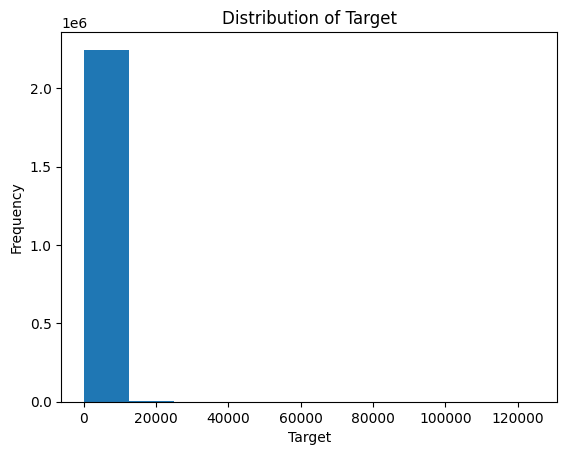

In [85]:
# Histogram of 'target'
indexedtrain['target'].plot(kind='hist')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Distribution of Target')
plt.show()

                     target  nbr_of_transactions
target                 1.00                 0.24
nbr_of_transactions    0.24                 1.00


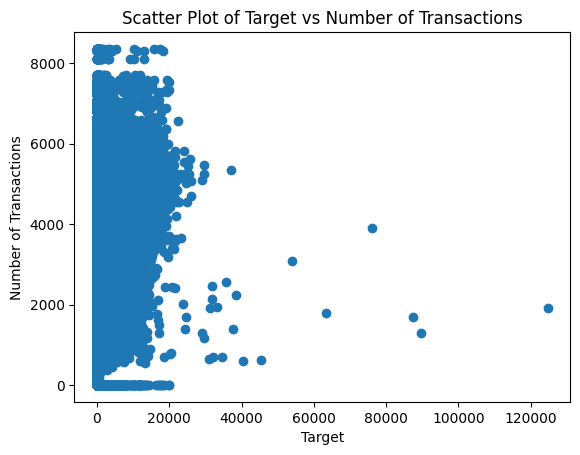

In [87]:
# Correlation matrix
corr_matrix = indexedtrain[['target', 'nbr_of_transactions']].corr()
print(corr_matrix)

# Scatter plot
plt.scatter(indexedtrain['target'], indexedtrain['nbr_of_transactions'])
plt.xlabel('Target')
plt.ylabel('Number of Transactions')
plt.title('Scatter Plot of Target vs Number of Transactions')
plt.show()

The correlation coefficient between 'target' and 'nbr_of_transactions' is 0.24. This indicates a positive correlation between the two variables, but the correlation is relatively weak.

It suggests that there is a weak tendency for the 'target' and 'nbr_of_transactions' to increase together, but the relationship is not very strong.

Therefore, based on the correlation coefficient of 0.24, there is a weak positive correlation between the 'target' and 'nbr_of_transactions' columns in our dataset.

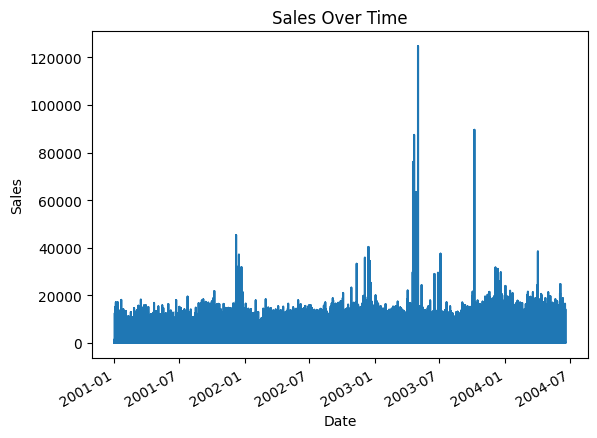

In [88]:
# Line plot of sales over time
indexedtrain['target'].plot()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.show()

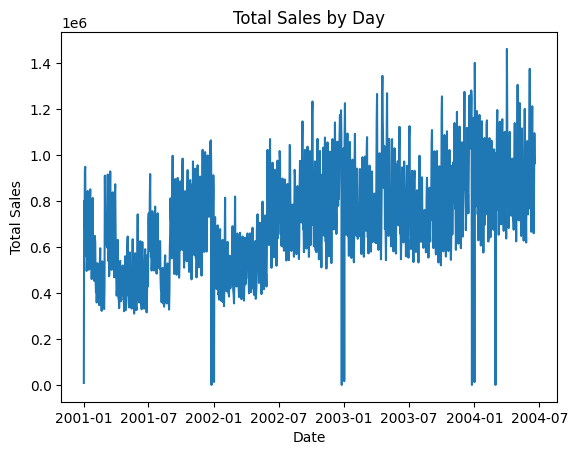

In [62]:
# Resample the data by day and calculate the total sales for each day
sales_daily = indexedtrain['target'].resample('D').sum()

# Create a line plot of the "sales" column
plt.plot(sales_daily.index, sales_daily)

# Set the title and axis labels
plt.title("Total Sales by Day")
plt.xlabel("Date")
plt.ylabel("Total Sales")

# Display the plot
plt.show()

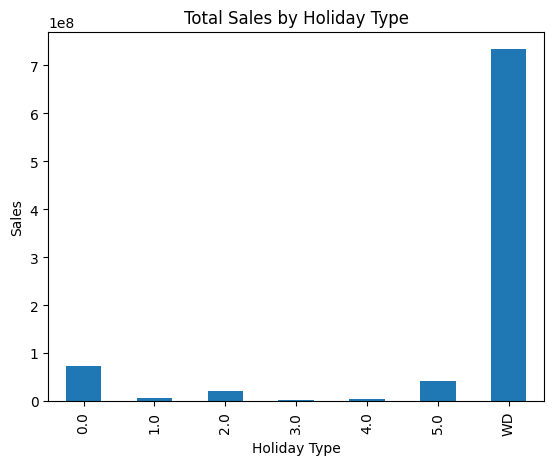

In [95]:
# Bar chart of sales by holiday type
indexedtrain.groupby('holiday_type')['target'].sum().plot(kind='bar')
plt.xlabel('Holiday Type')
plt.ylabel('Sales')
plt.title('Total Sales by Holiday Type')
plt.show()

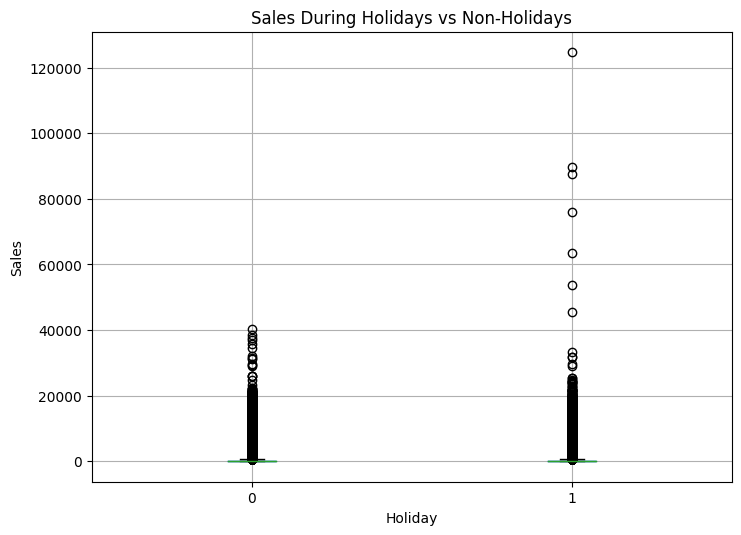

In [89]:
# Box plot of sales during holidays vs non-holidays
indexedtrain.boxplot(column='target', by='Holiday', figsize=(8, 6))
plt.xlabel('Holiday')
plt.ylabel('Sales')
plt.title('Sales During Holidays vs Non-Holidays')
plt.suptitle('')
plt.show()

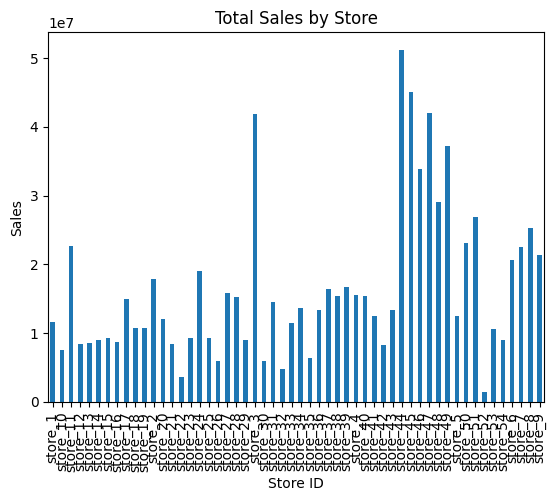

In [90]:
# Bar chart of sales by store
indexedtrain.groupby('store_id')['target'].sum().plot(kind='bar')
plt.xlabel('Store ID')
plt.ylabel('Sales')
plt.title('Total Sales by Store')
plt.show()

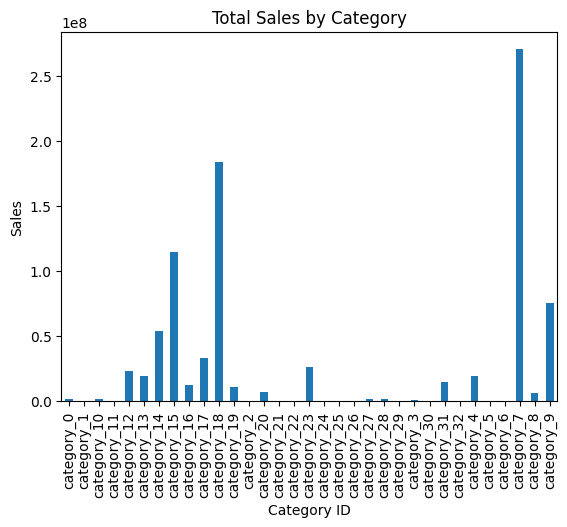

In [91]:
# Bar chart of sales by category
indexedtrain.groupby('category_id')['target'].sum().plot(kind='bar')
plt.xlabel('Category ID')
plt.ylabel('Sales')
plt.title('Total Sales by Category')
plt.show()

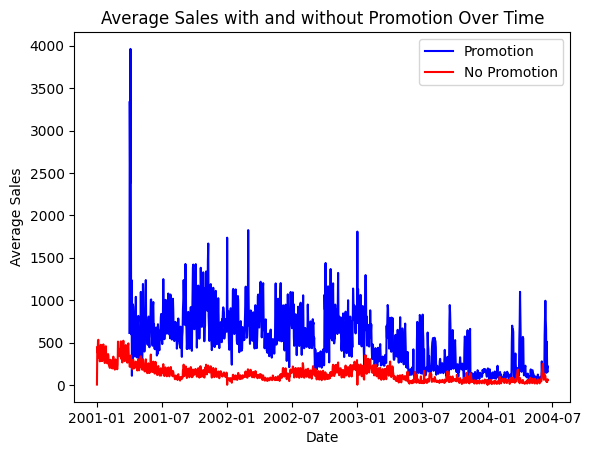

In [94]:
# Separate data for promotion and non-promotion
promotion_data = indexedtrain[indexedtrain['onpromotion'] == 1]
non_promotion_data = indexedtrain[indexedtrain['onpromotion'] == 0]

# Calculate average sales per day for promotion and non-promotion
promotion_avg_sales = promotion_data.groupby(promotion_data.index)['target'].mean()
non_promotion_avg_sales = non_promotion_data.groupby(non_promotion_data.index)['target'].mean()

# Line plot of average sales with and without promotion
plt.plot(promotion_avg_sales.index, promotion_avg_sales, label='Promotion', color='blue')
plt.plot(non_promotion_avg_sales.index, non_promotion_avg_sales, label='No Promotion', color='red')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.title('Average Sales with and without Promotion Over Time')
plt.legend()
plt.show()

In [98]:
# Filter data for the period from 2001 to 2003
sales_2001_to_2003 = indexedtrain['2001':'2003']

# Group by month and calculate sum of sales
monthly_sales = sales_2001_to_2003.groupby(sales_2001_to_2003.index.month)['target'].sum()

# Find the month with the highest sales
highest_sales_month = monthly_sales.idxmax()

# Print the month with the highest sales
print("The month with the highest sales from 2001 to 2003 is:", highest_sales_month)

The month with the highest sales from 2001 to 2003 is: 12


In [99]:
# Filter data for the period from 2001 to 2003
sales_2001_to_2003 = indexedtrain['2001':'2003']

# Group by month and calculate sum of sales
monthly_sales = sales_2001_to_2003.groupby(sales_2001_to_2003.index.month)['target'].sum()

# Find the month with the lowest sales
lowest_sales_month = monthly_sales.idxmin()

# Print the month with the lowest sales
print("The month with the lowest sales from 2001 to 2003 is:", lowest_sales_month)



The month with the lowest sales from 2001 to 2003 is: 2


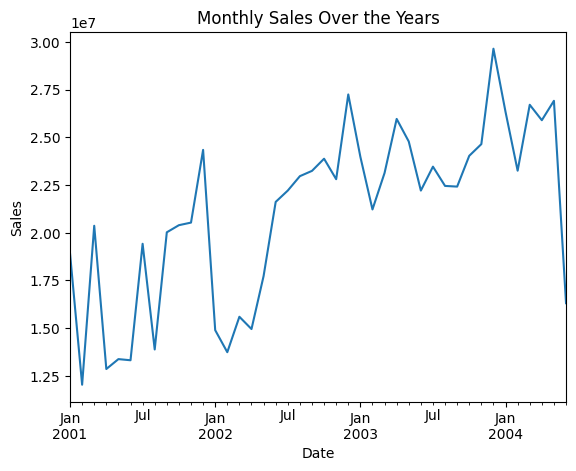

In [100]:
# Resample to monthly frequency and calculate sum of sales
monthly_sales = indexedtrain['target'].resample('M').sum()

# Plot the monthly sales data
monthly_sales.plot()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Over the Years')
plt.show()

In [75]:
# First group our sales into monthly sales and remove some columns which arent necessary now 
columns_to_remove = ['date', 'Holiday']
monthly_sales = indexedtrain.resample('M').sum().drop(columns=columns_to_remove)
monthly_sales

,target,onpromotion,nbr_of_transactions
fulldate,,,
2001-01-31,18911640.70,0,78986424.00
2001-02-28,12038352.63,0,75179511.00
2001-03-31,20365584.02,0,83999091.00
2001-04-30,12861251.06,1939,81036978.00
2001-05-31,13379785.26,11575,82607646.00
2001-06-30,13319958.17,21496,79171752.00
2001-07-31,19421891.04,69665,80597253.00
2001-08-31,13885176.42,42940,83739876.00
2001-09-30,20022416.11,71659,80821323.00


### Checking for Stationarity of the Train Dataset

In [59]:
indexedtrain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2248884 entries, 2001-01-01 to 2004-06-18
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   date                 int64  
 1   store_id             object 
 2   category_id          object 
 3   target               float64
 4   onpromotion          int64  
 5   nbr_of_transactions  float64
 6   holiday_type         object 
dtypes: float64(2), int64(2), object(3)
memory usage: 137.3+ MB


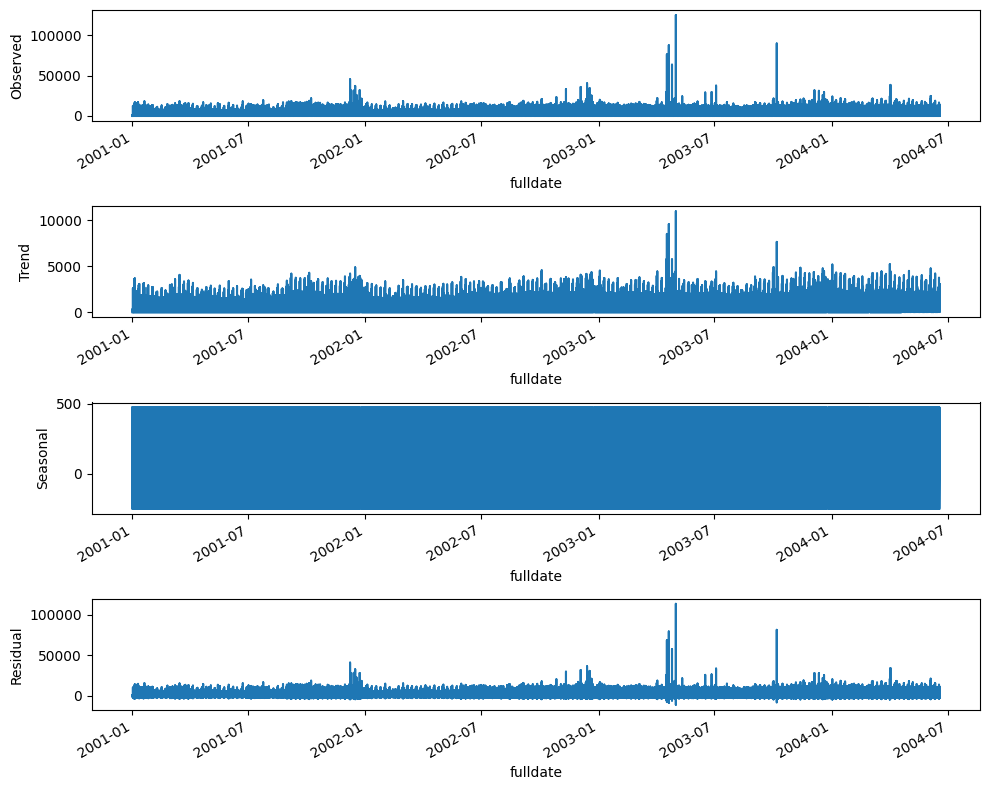

In [60]:
# Perform seasonal decomposition
result = seasonal_decompose(indexedtrain['target'], model='additive', period=12)  # Adjust the period as needed

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

Observed values: These are the actual values of the time series. They represent the data points that are observed or recorded over a period of time. In the context of sales data, the observed values would be the actual sales figures recorded at different time intervals.

Trend: The trend component represents the long-term pattern or direction of the time series. It captures the underlying growth or decline in the data over an extended period. The trend component helps identify whether the series is increasing, decreasing, or remaining relatively stable over time.

Seasonal: The seasonal component represents the periodic patterns or fluctuations that occur within a time series. It captures the regular and repetitive variations that happen within specific time periods, such as daily, weekly, monthly, or yearly cycles. In sales data, seasonal patterns may include higher sales during holiday seasons or lower sales during certain months of the year.

Residual: The residual component, also known as the irregular or random component, represents the remaining variation in the time series after removing the trend and seasonal components. It includes any unpredictable or random fluctuations that are not accounted for by the trend or seasonal patterns. The residual component is often assumed to be noise or measurement error.

Create an interactive visualization where you can manually select the time interval in the output visualization itself. I added a slider below my visualization and buttons to control time intervals above my  visualization

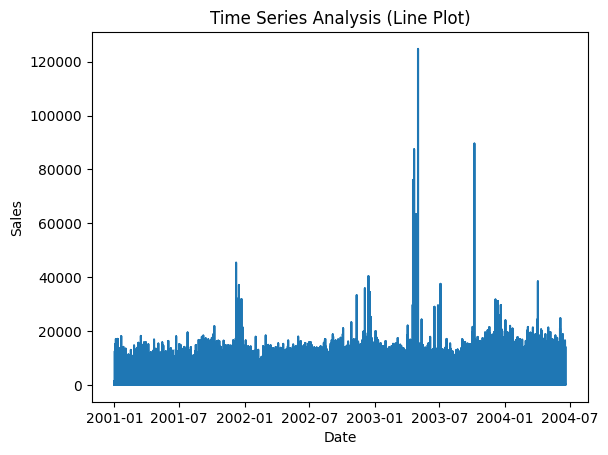

In [61]:
# Create the line plot
plt.plot(indexedtrain.index, indexedtrain['target'])
plt.title('Time Series Analysis (Line Plot)')
plt.xlabel('Date')
plt.ylabel('Sales')

# Display the plot
plt.show()